## Problem 4: Hierarchical Clustering

### Read Data
In the cell below, we read in the data into the variable X and standardize it. We print the number of rows and columns in the data.

In [2]:
# allow inline plots
%matplotlib notebook

# importing necessary modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# reading in the CSV data
X = pd.read_csv('ClusterSet1.txt', delim_whitespace = True)
X = StandardScaler().fit_transform(X)

print('rows = ' + str(X.shape[0]) + ', cols =  ' + str(X.shape[1]))

rows = 999, cols =  3


###  Agglomerative Hierarchical Clustering - Different Distance Functions

- We now run an Agglomerative Clustering algorithm on the data for the following distance functions: Euclidean, Squared Euclidean, Cityblock and Mahalanobis.
- For each distance function, we compute the cophenetic correlation (CC), and print the results.
- We identify the best distance function as the one with the highest CC.
- The link function we used is Average Distance. We chose this link function as it consistently yielded higher CC values compared to alternatives such as Single and Complete Linkage over a range of distance functions.

In [3]:
from scipy.cluster.hierarchy import linkage, dendrogram \
    , cophenet, fcluster, maxinconsts, inconsistent
from scipy.spatial.distance import pdist

metrics = ['euclidean', 'sqeuclidean', 'cityblock', 'mahalanobis']
coph_cors = []

for metric in metrics:
    clf_tree = linkage(X, method = 'average', metric = metric)
    coph_cors.append(cophenet(clf_tree, pdist(X, metric = metric))[0])
    print('Dist. Func. = ' + metric + '    CC = ' + str(coph_cors[-1]))

best_metric = metrics[np.argmax(coph_cors)]
print('\nBest Dist. Func. = ' + str(best_metric))

Dist. Func. = euclidean    CC = 0.821912934909
Dist. Func. = sqeuclidean    CC = 0.711843743473
Dist. Func. = cityblock    CC = 0.805252557498
Dist. Func. = mahalanobis    CC = 0.862966749855

Best Dist. Func. = mahalanobis


### Using The Best Distance Function - Mahalanobis

- From the results above, Mahalanobis is the clear winner among the distance functions with a CC of 0.86, with Euclidean coming in a close second with 0.82.
- We run the clustering algorithm with the Mahalanobis distance function and plot the resulting dendrogram.

<IPython.core.display.Javascript object>


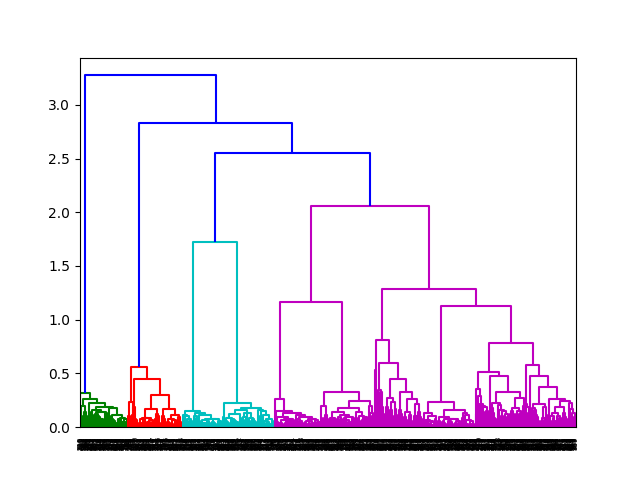

In [4]:
clf_tree = linkage(X, method = 'average', metric = best_metric)
tree_plot = dendrogram(clf_tree, ax = plt.subplots()[1])

### Cutting The Dendrogram To Get Clusters
- By visual analysis of the dendrogram above, we choose to cut it at a cophenetic distance (y axis) of 0.75.
- This yields 11 clusters, as seen below.
- On plotting the clusters, we see that 10 of these (all except Cluster_7) accurately label the true clusters present in the data. Cluster_7 consists of a handful of points that should belong to Cluster_8 but got assigned its own cluster. 

Number of clusters = 11


<IPython.core.display.Javascript object>


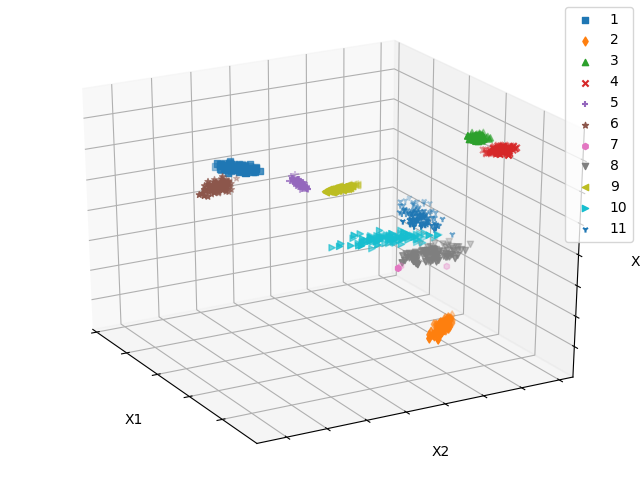

In [7]:
cluster_labels = fcluster(clf_tree, t=0.75, criterion='distance')
n_clusters = max(cluster_labels)
print('Number of clusters = ' + str(n_clusters))

from mpl_toolkits.mplot3d import Axes3D
import matplotlib
markers_list = ['o', 's', 'd', '^', 'x', '+', '*', 'h', 'v', '<', '>'
                , '1', '2', '3', '4', '8', 'H', 'D', 'p', '|', 'o', '_', ',']

ax = Axes3D(plt.figure())
ax.w_xaxis.set_ticklabels([]); ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('X1'); ax.set_ylabel('X2'); ax.set_zlabel('X3')

for label in range(1, n_clusters + 1):
    X_label = X[cluster_labels == label]
    ax.scatter(X_label[:,0], X_label[:,1], X_label[:, 2], label = str(label)
               , marker = markers_list[label])
ax.legend()

### Comparison With K-means and EM
- Our implementation of hierarchical clustering yielded slightly better results than K-means for this dataset. The final dendrogram revealed the presence of a 10th cluster that wasn't apparent in the elbow plot for K-means.
- Compared to EM, the results here were ...